## Description

##### For a frame consisting of numerous samples obtained from quantization of raw audio, amplitude envelope is defined as the maximum amplitude out of all those samples. It is an important time domain feature used for various tasks like onset detection and music genre classification. 

##### In this section, I attempt at extracting amplitude envelope using basic python syntax and librosa, an open source library for music and audio analysis. 

#### Turns out librosa doesn't have amplitude envelope extractor. So, first, I build it from scratch.

# Packages

In [19]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Let's start naaoww

In [1]:


debussy_file = "raw audio/debussy.wav"
redhot_file = "raw audio/redhot.wav"
duke_file = "raw audio/duke.wav"

### Let's get some music in here

In [ ]:
ipd.Audio(duke_file)

In [ ]:
ipd.Audio(debussy_file)

In [ ]:
ipd.Audio(redhot_file)

### ...Okaaay

In [7]:
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(debussy_file)
duke, _ = librosa.load(duke_file)

### Some parameters


In [10]:

debussy.size # the total number of samples overall in this clip

661500

In [15]:
sample_duration = 1/sr
print(f"{sample_duration: .8f} seconds")  # duration of each sample

 0.00004535 seconds


In [16]:
total_duration = sample_duration*(debussy.size)
print(f"Duration of signal: {total_duration: .3f} seconds")

Duration of signal:  30.000 seconds


### Visualizing the waveforms

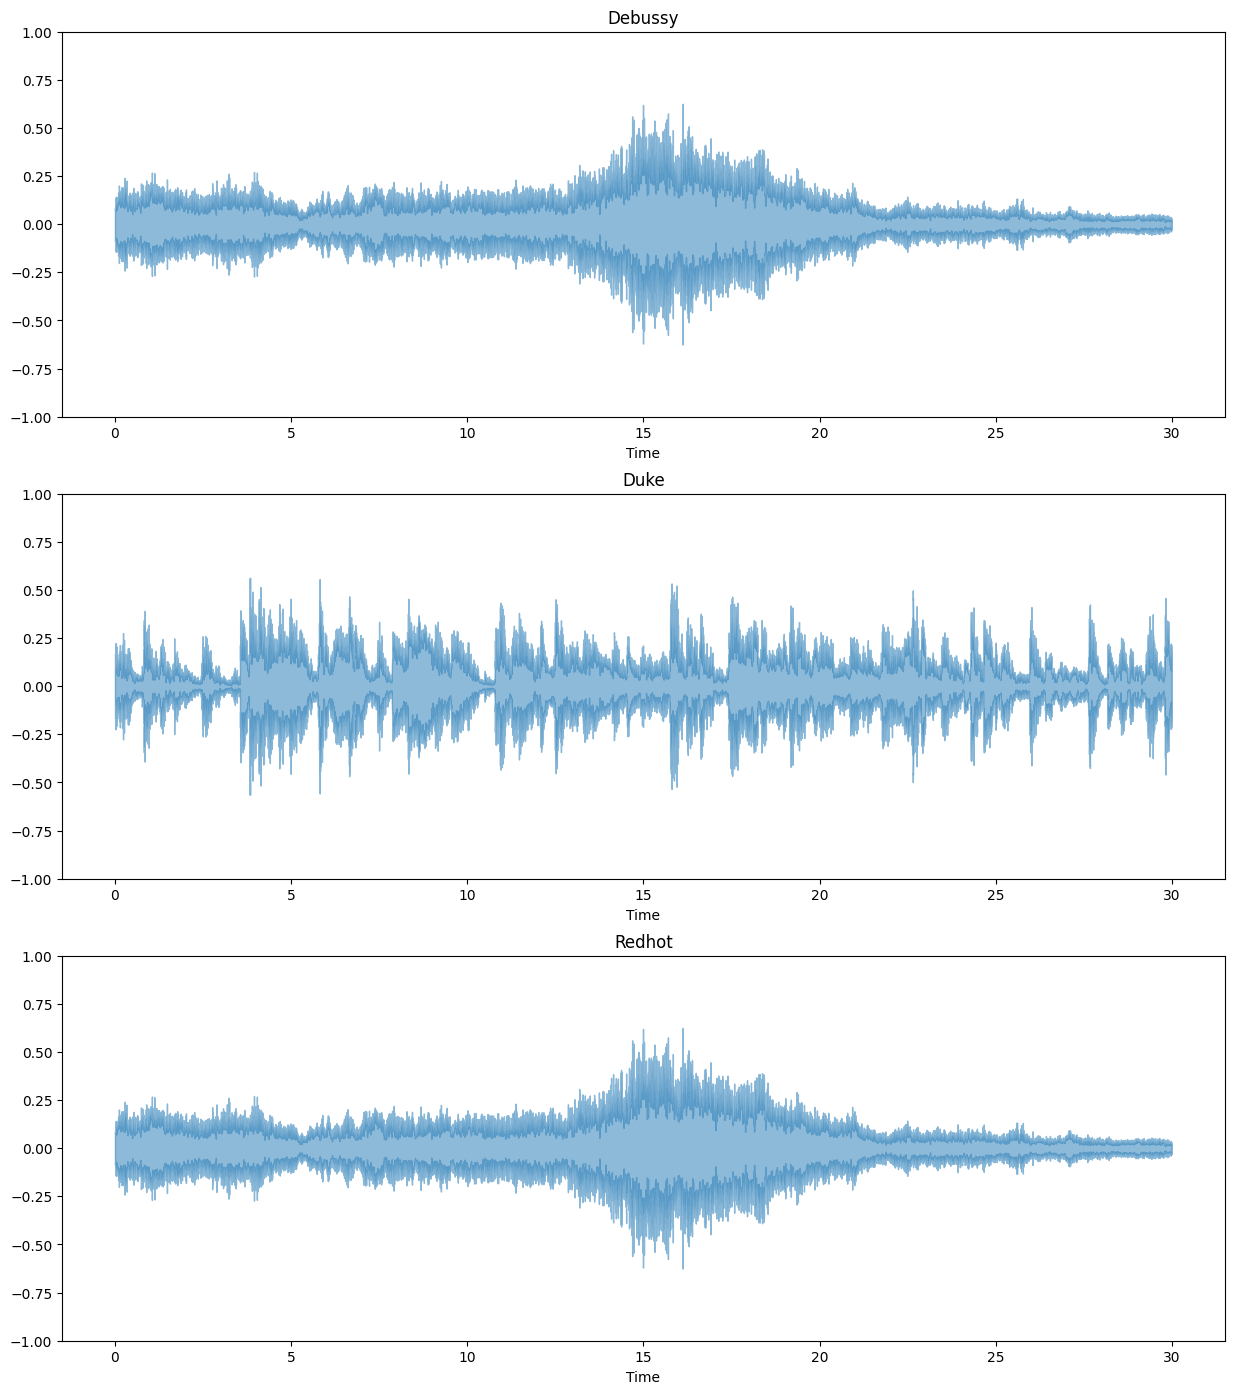

In [18]:
plt.figure(figsize=(15, 17)) 

plt.subplot(3, 1, 1) # 3 rows, 1 column, selecting 1st subplot
librosa.display.waveshow(debussy, alpha = 0.5)
plt.title("Debussy")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2) 
librosa.display.waveshow(duke,alpha = 0.5 )
plt.title("Duke")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3) 
librosa.display.waveshow(redhot, alpha = 0.5)
plt.title("Redhot")
plt.ylim(-1, 1)

plt.show()






### Calculating the amplitude envelope

In [23]:
FRAME_SIZE = 1024 # number of samples in a frame
HOP_LENGTH = 512 # number of samples to be shifted from right to next frame

def extract_amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    for i in range(0, len(signal), hop_length): # iterating over each hopping section
        current_frame_amp_envelope = max(signal[i :i+frame_size])
        amplitude_envelope.append(current_frame_amp_envelope)
    
    return np.array(amplitude_envelope)

In [24]:
ae_debussy = extract_amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
ae_duke = extract_amplitude_envelope(duke, FRAME_SIZE, HOP_LENGTH)
ae_redhot = extract_amplitude_envelope(redhot, FRAME_SIZE, HOP_LENGTH)

### Visualizing AE for all our audios

In [ ]:
frames = range(0, ae_debussy.size) # getting list of all frame numbers
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH) 


plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1) 
librosa.display.waveshow(debussy, alpha = 0.5)
plt.plot(t, ae_debussy, color='r') # x-> time, y-> ae since AE is a time domain feature
plt.title("Debussy")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)
librosa.display.waveshow(duke,alpha = 0.5 )
plt.plot(t, ae_duke, color='r')
plt.title("Duke")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3) 
librosa.display.waveshow(redhot, alpha = 0.5)
plt.plot(t, ae_redhot, color='r')
plt.title("Redhot")
plt.ylim(-1, 1)

plt.show()